In [1]:
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np

matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
# Remove outliers as indicated by the creator of the dataset

In [5]:
train = train.drop(train[(train['GrLivArea']>4000)].index)

In [6]:
import matplotlib.pyplot as plt

C:\Users\dalil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.065449
Kurtosis: 0.666438


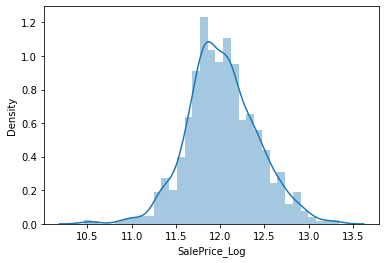

In [7]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

sns.distplot(train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice_Log'].skew())
print("Kurtosis: %f" % train['SalePrice_Log'].kurt())
# dropping old column
train.drop('SalePrice', axis= 1, inplace=True)

In [11]:
# The target variable Sales price is now normally distributed and with a low kurtosis (which means less outliers)

In [12]:
# Dealing with missing values

In [8]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 0 in these columns
for col in cols_fillna:
    train[col].fillna(0,inplace=True)
    test[col].fillna(0,inplace=True)

In [9]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177885
GarageYrBlt,81,0.055632
MasVnrArea,8,0.005495
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


In [10]:
# fillna with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [11]:
train.isnull().sum().sum()

0

In [12]:
test.isnull().sum().sum()

0

In [13]:
# Handling skewed features

In [14]:
for df in [train, test]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
    df['MSSubClass_Log']=np.log(df['MSSubClass'])
    df.drop('MSSubClass', inplace= True, axis = 1)
    df['LotFrontage_Log']=np.log(df['LotFrontage'])
    df.drop('LotFrontage', inplace= True, axis = 1)
    df['MasVnrArea_Log']=np.log(df['MasVnrArea'])
    df.drop('MasVnrArea', inplace= True, axis = 1)
    df['BsmtFinSF1_Log']=np.log(df['BsmtFinSF1'])
    df.drop('BsmtFinSF1', inplace= True, axis = 1)
    df['BsmtFinSF2_Log']=np.log(df['BsmtFinSF2'])
    df.drop('BsmtFinSF2', inplace= True, axis = 1)
    df['TotalBsmtSF_Log']=np.log(df['TotalBsmtSF'])
    df.drop('TotalBsmtSF', inplace= True, axis = 1)
    df['1stFlrSF_Log']=np.log(df['1stFlrSF'])
    df.drop('1stFlrSF', inplace= True, axis = 1)
    df['LowQualFinSF_Log']=np.log(df['LowQualFinSF'])
    df.drop('LowQualFinSF', inplace= True, axis = 1)
    df['BsmtHalfBath_Log']=np.log(df['BsmtHalfBath'])
    df.drop('BsmtHalfBath', inplace= True, axis = 1)
    df['KitchenAbvGr_Log']=np.log(df['KitchenAbvGr'])
    df.drop('KitchenAbvGr', inplace= True, axis = 1)
    df['WoodDeckSF_Log']=np.log(df['WoodDeckSF'])
    df.drop('WoodDeckSF', inplace= True, axis = 1)
    df['OpenPorchSF_Log']=np.log(df['OpenPorchSF'])
    df.drop('OpenPorchSF', inplace= True, axis = 1)
    df['EnclosedPorch_Log']=np.log(df['EnclosedPorch'])
    df.drop('EnclosedPorch', inplace= True, axis = 1)
    df['3SsnPorch_Log']=np.log(df['3SsnPorch'])
    df.drop('3SsnPorch', inplace= True, axis = 1)
    df['ScreenPorch_Log']=np.log(df['ScreenPorch'])
    df.drop('ScreenPorch', inplace= True, axis = 1)
    df['PoolArea_Log']=np.log(df['PoolArea'])
    df.drop('PoolArea', inplace= True, axis = 1)
    df['MiscVal_Log']=np.log(df['MiscVal'])
    df.drop('MiscVal', inplace= True, axis = 1)
    

C:\Users\dalil\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
train = train.replace(-np.inf,0)

In [16]:
test = test.replace(-np.inf,0)

In [17]:
corr = train.corr()

In [18]:
numerical_feats = train.dtypes[train.dtypes != "object"].index

In [19]:
len (numerical_feats)

38

In [20]:
corr

,Id,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,LowQualFinSF_Log,BsmtHalfBath_Log,KitchenAbvGr_Log,WoodDeckSF_Log,OpenPorchSF_Log,EnclosedPorch_Log,3SsnPorch_Log,ScreenPorch_Log,PoolArea_Log,MiscVal_Log
Id,1.000000,-0.032323,0.013337,-0.014034,-0.023076,-0.007000,0.002578,-0.001019,0.004005,0.005248,...,-0.033322,0.004094,0.006925,-0.049519,0.004799,-0.004864,-0.039458,0.004834,0.037939,-0.038408
OverallQual,-0.032323,1.000000,-0.090692,0.571712,0.550971,0.310164,0.279745,0.104092,0.543791,0.267431,...,-0.029219,0.011144,-0.186824,0.277980,0.441112,-0.157218,0.028877,0.052881,0.021348,-0.084579
OverallCond,0.013337,-0.090692,1.000000,-0.375691,0.074703,-0.137267,0.031297,-0.053107,-0.194167,-0.059927,...,0.028488,-0.019192,-0.090053,-0.038398,-0.099497,0.092158,0.038758,0.061304,0.002317,0.079141
YearBuilt,-0.014034,0.571712,-0.375691,1.000000,0.591906,0.148810,0.002953,0.185009,0.466710,0.240144,...,-0.182214,0.023727,-0.173730,0.305444,0.386383,-0.446161,0.029341,-0.058874,-0.016334,-0.077410
YearRemodAdd,-0.023076,0.550971,0.074703,0.591906,1.000000,0.180972,0.136103,0.116765,0.438212,0.181136,...,-0.057267,0.011103,-0.155422,0.284083,0.380597,-0.226287,0.052715,-0.039353,-0.008236,-0.074210
BsmtUnfSF,-0.007000,0.310164,-0.137267,0.148810,0.180972,1.000000,0.002749,-0.424026,0.289399,-0.041925,...,0.010867,0.005203,0.025647,0.026472,0.189940,0.000591,0.007775,-0.020870,-0.033871,-0.055960
2ndFlrSF,0.002578,0.279745,0.031297,0.002953,0.136103,0.002749,1.000000,-0.178521,0.410642,0.609022,...,0.066881,-0.029535,0.057675,0.079667,0.217836,0.042076,-0.021437,0.020892,0.044123,0.000387
BsmtFullBath,-0.001019,0.104092,-0.053107,0.185009,0.116765,-0.424026,-0.178521,1.000000,-0.069457,-0.034861,...,-0.057104,-0.030385,-0.042689,0.159009,0.071953,-0.074417,0.008868,0.028182,0.041910,-0.000371
FullBath,0.004005,0.543791,-0.194167,0.466710,0.438212,0.289399,0.410642,-0.069457,1.000000,0.130335,...,0.001231,-0.038058,0.139772,0.226530,0.376760,-0.145011,0.034404,-0.024181,0.024883,-0.043275
HalfBath,0.005248,0.267431,-0.059927,0.240144,0.181136,-0.041925,0.609022,-0.034861,0.130335,1.000000,...,-0.023304,0.045686,-0.070099,0.107047,0.252237,-0.123713,-0.000506,0.063096,0.002038,-0.027180


In [21]:
corr.nlargest(38,"SalePrice_Log")["SalePrice_Log"]

SalePrice_Log        1.000000
OverallQual          0.819240
GrLivArea_Log        0.732805
GarageCars           0.680408
GarageArea           0.655211
1stFlrSF_Log         0.611018
FullBath             0.590919
YearBuilt            0.588977
YearRemodAdd         0.568986
TotRmsAbvGrd         0.533446
GarageYrBlt          0.502558
Fireplaces           0.487126
OpenPorchSF_Log      0.461065
MasVnrArea_Log       0.423049
LotArea_Log          0.400132
TotalBsmtSF_Log      0.372620
LotFrontage_Log      0.343085
WoodDeckSF_Log       0.340951
HalfBath             0.311191
2ndFlrSF             0.306605
BsmtFullBath         0.238851
BsmtUnfSF            0.223248
BsmtFinSF1_Log       0.204675
BedroomAbvGr         0.204117
ScreenPorch_Log      0.108531
MoSold               0.062231
3SsnPorch_Log        0.060107
PoolArea_Log         0.040578
BsmtHalfBath_Log    -0.005216
Id                  -0.020511
MSSubClass_Log      -0.022258
BsmtFinSF2_Log      -0.028758
YrSold              -0.034319
OverallCon

In [22]:
# Dropping numerical data with low correlation with the target

In [23]:
train = train.drop(columns=["Fireplaces","OpenPorchSF_Log","MasVnrArea_Log","LotArea_Log","TotalBsmtSF_Log","LotFrontage_Log","WoodDeckSF_Log","2ndFlrSF","HalfBath", 
"BsmtFullBath","BsmtUnfSF","BedroomAbvGr","BsmtFinSF1_Log","ScreenPorch_Log","PoolArea_Log","3SsnPorch_Log","MoSold","BsmtHalfBath_Log","Id","MSSubClass_Log","BsmtFinSF2_Log",
"OverallCond","YrSold","LowQualFinSF_Log","MiscVal_Log","KitchenAbvGr_Log","EnclosedPorch_Log"])

In [24]:
id_test = test['Id']

In [25]:
test.shape

(1459, 80)

In [26]:
id_test.shape

(1459,)

In [27]:
test = test.drop(columns=["Fireplaces","OpenPorchSF_Log","MasVnrArea_Log","LotArea_Log","TotalBsmtSF_Log","LotFrontage_Log","WoodDeckSF_Log","2ndFlrSF","HalfBath", 
"BsmtFullBath","BsmtUnfSF","BedroomAbvGr","BsmtFinSF1_Log","ScreenPorch_Log","PoolArea_Log","3SsnPorch_Log","MoSold","BsmtHalfBath_Log","Id","MSSubClass_Log","BsmtFinSF2_Log",
"OverallCond","YrSold","LowQualFinSF_Log","MiscVal_Log","KitchenAbvGr_Log","EnclosedPorch_Log"])

In [28]:
train.corr()

,OverallQual,YearBuilt,YearRemodAdd,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,1stFlrSF_Log
OverallQual,1.000000,0.571712,0.550971,0.543791,0.415834,0.517200,0.598739,0.554905,0.819240,0.603760,0.442746
YearBuilt,0.571712,1.000000,0.591906,0.466710,0.089207,0.780104,0.536749,0.477311,0.588977,0.230041,0.272845
YearRemodAdd,0.550971,0.591906,1.000000,0.438212,0.187520,0.617319,0.419573,0.369590,0.568986,0.309083,0.229650
FullBath,0.543791,0.466710,0.438212,1.000000,0.549625,0.467278,0.465325,0.400780,0.590919,0.648868,0.358910
TotRmsAbvGrd,0.415834,0.089207,0.187520,0.549625,1.000000,0.135216,0.358069,0.325467,0.533446,0.822042,0.389711
GarageYrBlt,0.517200,0.780104,0.617319,0.467278,0.135216,1.000000,0.481735,0.475308,0.502558,0.234799,0.207879
GarageCars,0.598739,0.536749,0.419573,0.465325,0.358069,0.481735,1.000000,0.886882,0.680408,0.493901,0.445887
GarageArea,0.554905,0.477311,0.369590,0.400780,0.325467,0.475308,0.886882,1.000000,0.655211,0.464328,0.474118
SalePrice_Log,0.819240,0.588977,0.568986,0.590919,0.533446,0.502558,0.680408,0.655211,1.000000,0.732805,0.611018
GrLivArea_Log,0.603760,0.230041,0.309083,0.648868,0.822042,0.234799,0.493901,0.464328,0.732805,1.000000,0.531182


In [29]:
## The features need to be highly correlated with the target but independant between themself
## Let's remove features causing multicollinearity (threshold = 0,7)
## Between the 2 features correlated delete the one the least correlated to the target

In [30]:
train = train.drop(columns=["GarageYrBlt","TotRmsAbvGrd","GarageArea"])

In [31]:
test = test.drop(columns=["GarageYrBlt","TotRmsAbvGrd","GarageArea"])

In [32]:
categorical_feats = train.dtypes[train.dtypes == "object"].index

In [33]:
categorical_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<ipython-input-34-cf3d507dcd78>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


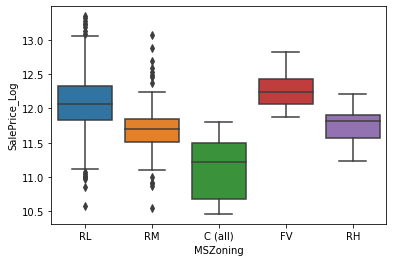

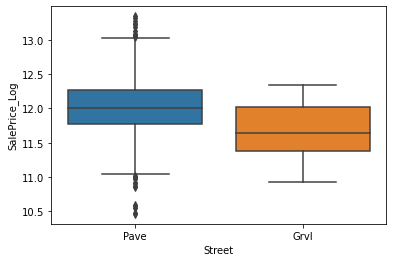

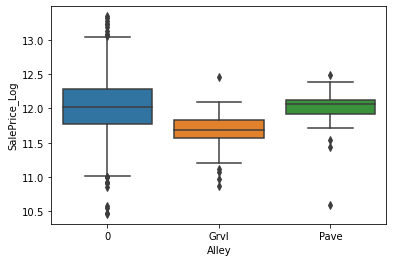

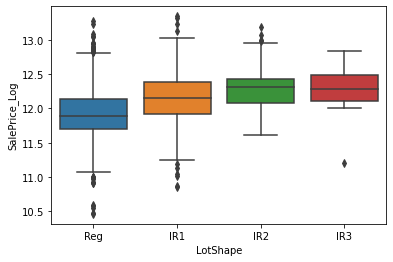

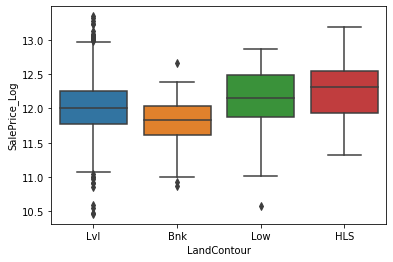

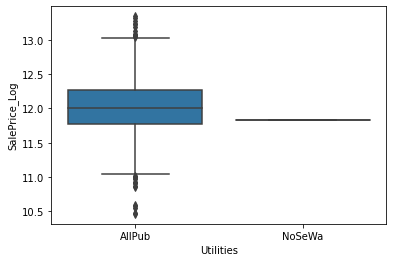

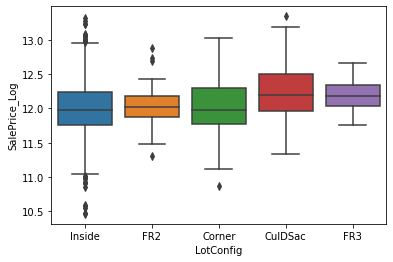

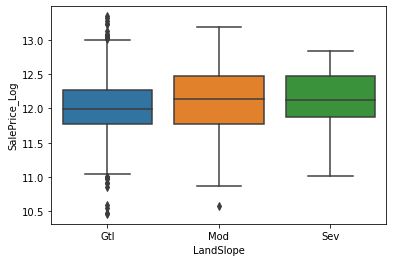

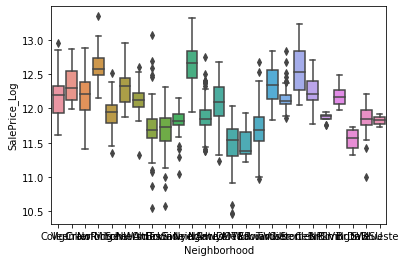

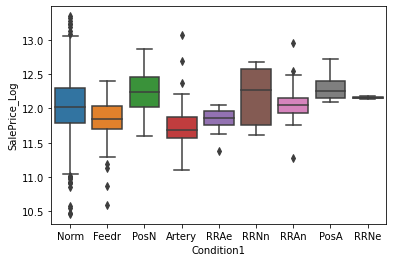

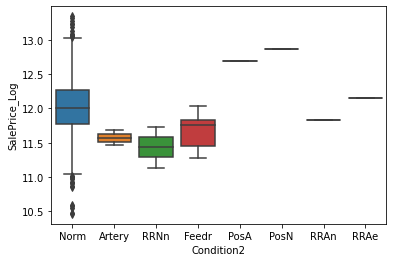

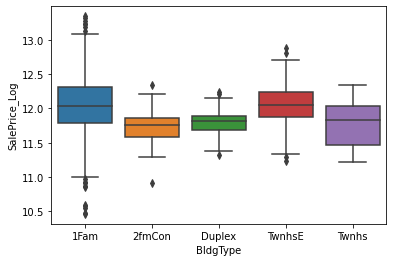

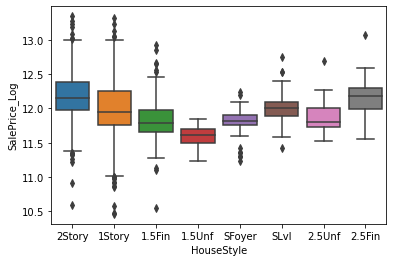

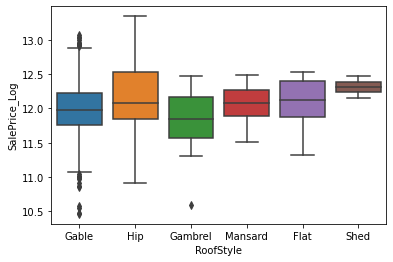

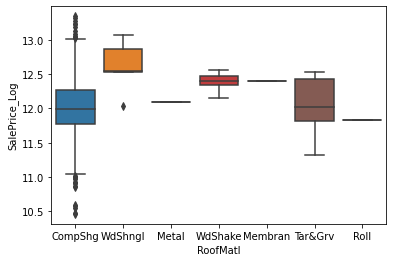

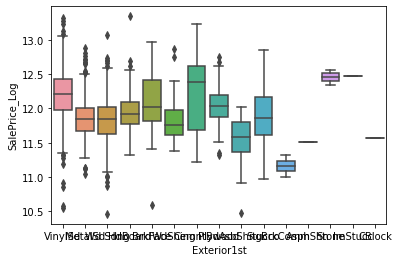

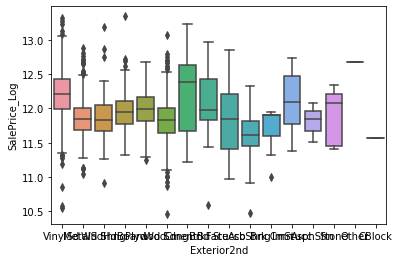

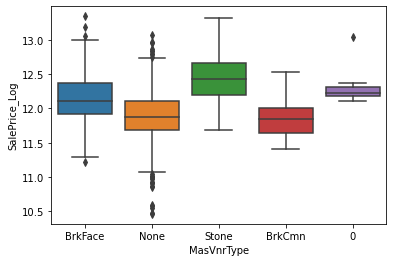

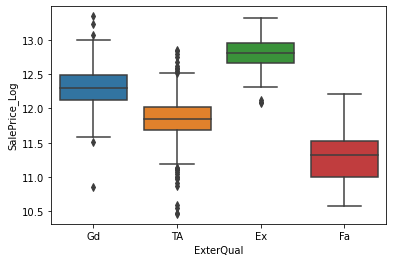

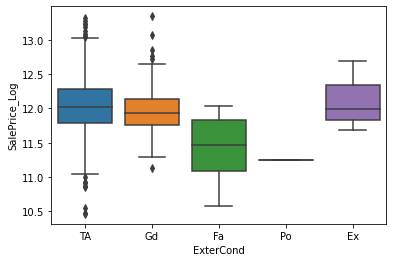

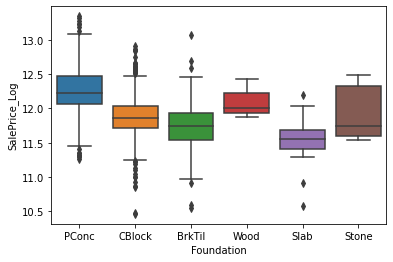

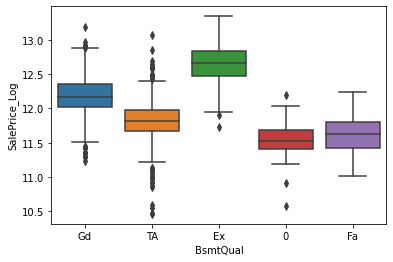

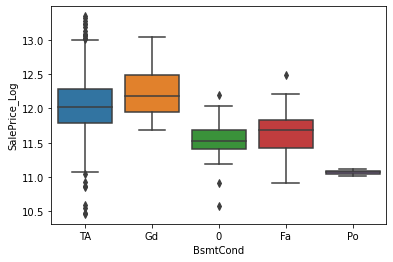

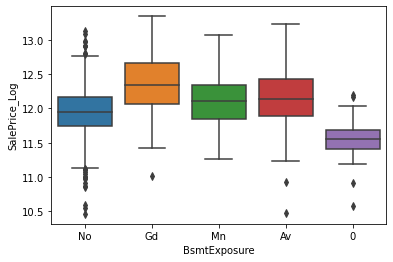

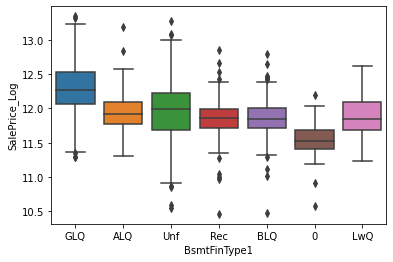

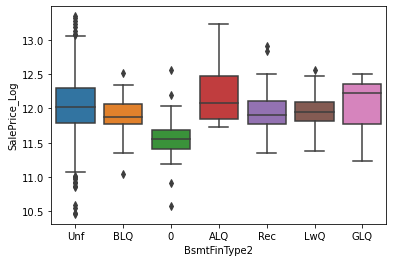

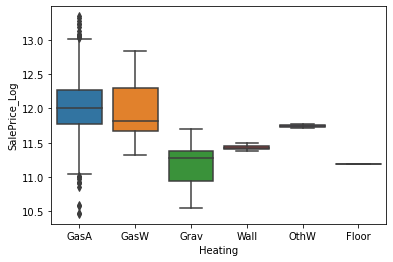

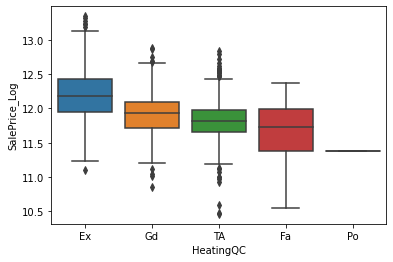

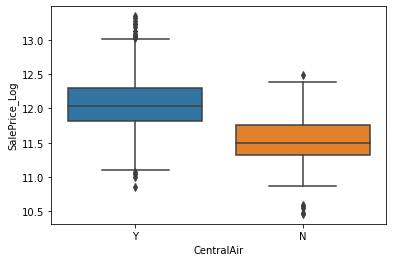

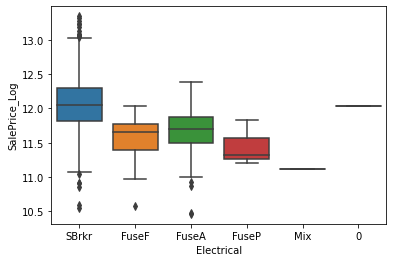

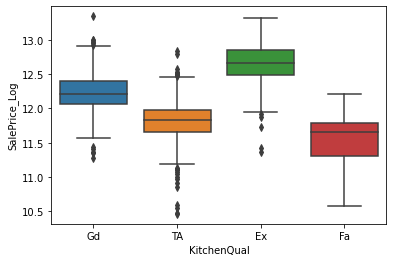

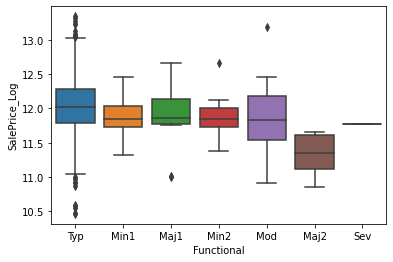

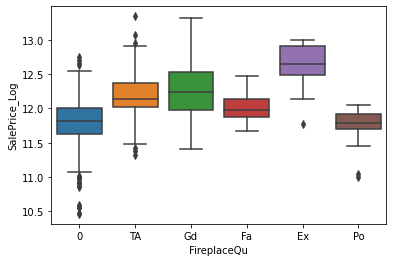

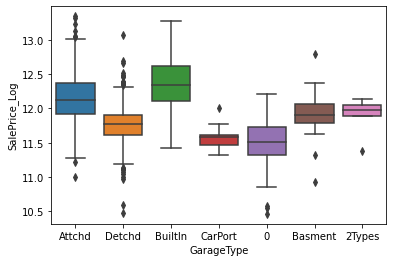

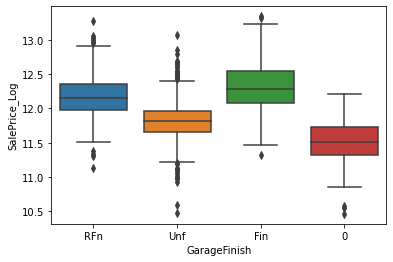

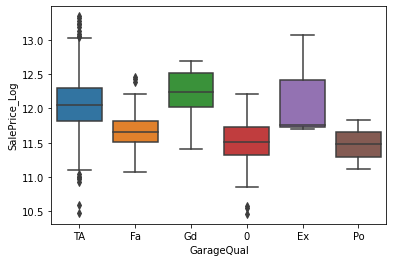

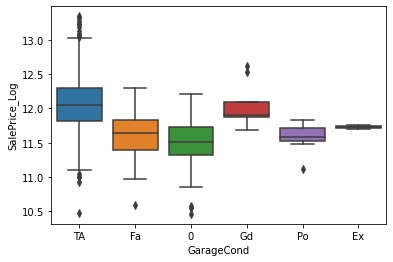

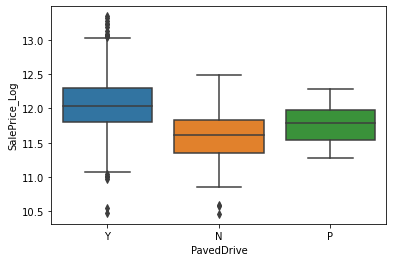

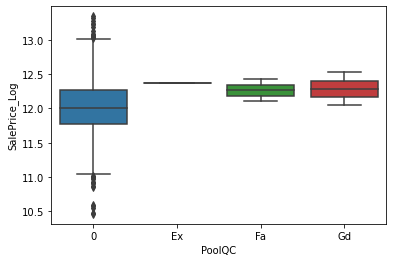

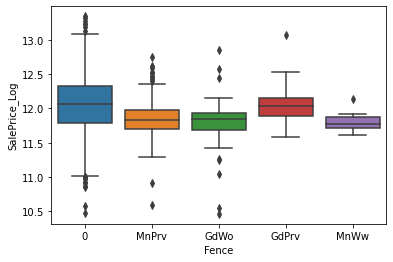

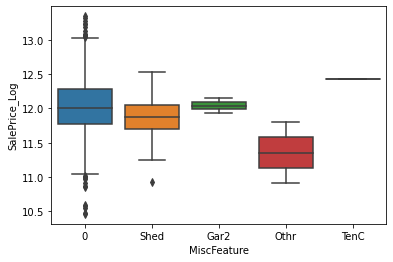

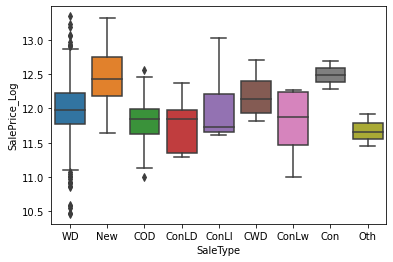

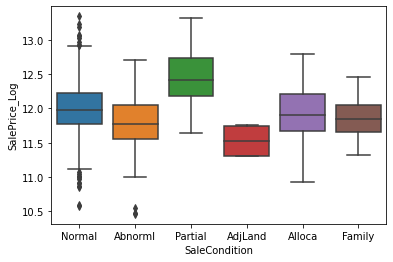

In [34]:
import matplotlib.pyplot as plt
for i in range(len(categorical_feats)):
    fig, ax = plt.subplots()
    sns.boxplot(x=categorical_feats[i],y="SalePrice_Log",data=train)

In [28]:
## Droping the categorical features with low correlation to the target 

In [35]:
train = train.drop(columns=["Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","BldgType","RoofStyle","PavedDrive","Fence",'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'])

In [36]:
test = test.drop(columns=["Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","BldgType","RoofStyle","PavedDrive","Fence",'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'])

In [37]:
train.columns

Index(['MSZoning', 'Street', 'Condition1', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'FullBath', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PoolQC', 'MiscFeature', 'SaleCondition', 'SalePrice_Log',
       'GrLivArea_Log', '1stFlrSF_Log'],
      dtype='object')

In [38]:
train = train.drop(columns=["Street","Condition1","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","ExterCond","Foundation",
                           "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Functional",
                           "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","MiscFeature","SaleCondition"])

In [39]:
test = test.drop(columns=["Street","Condition1","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","ExterCond","Foundation",
                           "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","Functional",
                           "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","MiscFeature","SaleCondition"])

In [40]:
train = train.replace({"CentralAir":{"Y":1,"N":0}})

In [41]:
test = test.replace({"CentralAir":{"Y":1,"N":0}})

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
categorical_feats = train.dtypes[train.dtypes == "object"].index

In [44]:
train =  train.replace({"MasVnrType":{0:"None"},"BsmtQual":{0:"None"},"Electrical":{0:"None"}})

In [45]:
test = test.replace({"BsmtQual":{0:"None"},"Electrical":{0:"None"},"MSZoning":{0:"None"}})
#,"KitchenQual":{0,"None"},"SaleType":{0:"None"}})

In [46]:
dic = {"KitchenQual":{0:"None"},"SaleType":{0:"None"}}

In [47]:
test = test.replace(dic)

In [51]:
numerical_feats = train.dtypes[train.dtypes == "object"].index

In [52]:
train[categorical_feats]

,MSZoning,Neighborhood,Condition2,MasVnrType,ExterQual,BsmtQual,Electrical,KitchenQual,SaleType
0,RL,CollgCr,Norm,BrkFace,Gd,Gd,SBrkr,Gd,WD
1,RL,Veenker,Norm,None,TA,Gd,SBrkr,TA,WD
2,RL,CollgCr,Norm,BrkFace,Gd,Gd,SBrkr,Gd,WD
3,RL,Crawfor,Norm,None,TA,TA,SBrkr,Gd,WD
4,RL,NoRidge,Norm,BrkFace,Gd,Gd,SBrkr,Gd,WD
...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,Norm,None,TA,Gd,SBrkr,TA,WD
1456,RL,NWAmes,Norm,Stone,TA,Gd,SBrkr,TA,WD
1457,RL,Crawfor,Norm,None,Ex,TA,SBrkr,Gd,WD
1458,RL,NAmes,Norm,None,TA,TA,FuseA,Gd,WD


In [49]:
OH_train = pd.get_dummies(train, columns=['MSZoning'])

In [50]:
OH_test = pd.get_dummies(test, columns=['MSZoning'])

In [53]:
OH_train.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,FullBath,GarageCars,SalePrice_Log,GrLivArea_Log,1stFlrSF_Log,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
366,6,1963,1963,1,2,11.976659,7.239933,7.239933,0,0,0,1,0
654,8,1995,1995,2,3,12.765688,7.655864,7.655864,0,0,0,1,0
1041,6,1966,2000,1,2,12.061047,7.397562,6.684612,0,0,0,1,0
236,7,2004,2004,2,2,12.130810,7.254178,7.254178,0,0,0,1,0
1004,7,2005,2006,2,2,12.106252,7.315884,7.315884,0,0,0,1,0


In [52]:
y = OH_train.SalePrice_Log

In [163]:
#y_test = OH_test.SalePrice_Log

In [54]:
OH_train = OH_train.drop(columns="SalePrice_Log")

In [55]:
X_test = OH_test

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(OH_train, y, test_size=0.3, random_state=1,shuffle=True)

In [57]:
X_train.to_csv("X_train2.csv")
X_val.to_csv("X_val2.csv")
X_test.to_csv("X_test2.csv")
y_train.to_csv("y_train2.csv")
y_val.to_csv("y_val2.csv")

In [66]:
X_test.shape

(1459, 77)

In [178]:
id_test.to_csv("id_test.csv")

In [67]:
id_test.shape

(1459,)